In [1]:
from os import path
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from laptrack import LapTrack
from laptrack import datasets
import napari
from skimage import io

plt.rcParams["font.family"] = ""

Loading Dataset

In [2]:
path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/spots_intensities_c2.pkl'
spots_df = pd.read_pickle(path)

In [3]:
spots_df.head()

,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame
0,209.666667,138.0,239.0,-4.0,2.0,2.0,11.0,0
1,170.516848,67.0,199.0,1.0,2.0,2.0,3.0,0
2,194.000000,140.0,59.0,1.0,2.0,2.0,3.0,0
3,172.922264,143.0,127.0,2.0,2.0,2.0,1.0,0
4,170.000000,84.0,104.0,2.0,2.0,2.0,2.0,0


In [4]:
spots_df[800:810]

,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame
800,191.000000,111.0,200.0,44.0,2.0,1.0,3.0,1
801,180.918748,119.0,162.0,44.0,2.0,2.0,4.0,1
802,166.286057,120.0,247.0,44.0,2.0,2.0,4.0,1
803,167.000000,146.0,142.0,44.0,2.0,1.0,3.0,1
804,214.056989,158.0,63.0,44.0,2.0,1.0,3.0,1
805,169.457576,196.0,191.0,43.0,2.0,2.0,5.0,1
806,187.000000,209.0,166.0,44.0,2.0,1.0,3.0,1
807,178.000000,213.0,214.0,44.0,2.0,1.0,3.0,1
808,174.333333,84.0,60.0,44.0,0.0,1.0,1.0,1
809,208.000000,92.0,14.0,45.0,1.0,2.0,3.0,1


Loading 3_D dataset

# Hyper parameters for LapTrack 
1. track_dist_metric="sqeuclidean",  # The similarity metric for particles. See `scipy.spatial.distance.cdist` for allowed values.
2. splitting_dist_metric="sqeuclidean",
3. merging_dist_metric="sqeuclidean",
4. track_cost_cutoff = max_distanceˆ2  # Need to explicitly define this or else it will take the default value which is 15ˆ2
5. gap_closing_cost_cutoff = max_distanceˆ2  # Need to explicity define this value or make it False else it will take the default value which is 15ˆ2
6. gap_closing_max_frame_count = 1 # By default this value is 2, i set it to 1 as required in our case 
7. splitting_cost_cutoff=False # This remains false for our analysis
8. merging_cost_cutoff=False # This remains false for our analysis

In [5]:
max_distance = 3
lt = LapTrack(
    track_dist_metric="sqeuclidean",  # The similarity metric for particles. See `scipy.spatial.distance.cdist` for allowed values.
    splitting_dist_metric="sqeuclidean",
    merging_dist_metric="sqeuclidean",
    # the square of the cutoff distance for the "sqeuclidean" metric
    track_cost_cutoff = max_distance**2,
    gap_closing_cost_cutoff = (2*max_distance)**2,
    gap_closing_max_frame_count = 1, 
    splitting_cost_cutoff=False,  # or False for non-splitting case
    merging_cost_cutoff=False  # or False for non-merging case 
)

In [6]:
print(lt.gap_closing_max_frame_count)

1


In [7]:
track_df, split_df, merge_df = lt.predict_dataframe(
    spots_df,
    coordinate_cols=[
        "mu_x",
        "mu_y",
        "mu_z"
    ],  # the column names for the coordinates
    frame_col="frame",  # the column name for the frame (default "frame")
    only_coordinate_cols=False,  # if False, returned track_df includes columns not in coordinate_cols.
    # False will be the default in the major release.
)

In [8]:
c2_tracking_pickle_file = "/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/track_df_c2.pkl"

# Save the DataFrame to a pickle file
track_df.to_pickle(c2_tracking_pickle_file)

`track_df` is the original dataframe with additional columns "track_id" and "tree_id".

The track_id is a unique id for each track segments without branches. A new id is assigned when a splitting and merging occured. 

The tree_id is a unique id for each "clonal" tracks sharing the same ancestor.

In [9]:
track_df[1420:1435]

amplitude   mu_x   mu_y  mu_z  sigma_x  sigma_y  sigma_z  \
frame index                                                              
2     401    205.170218  138.0   43.0  71.0      2.0      4.0      4.0   
      402    211.328460  226.0   39.0  71.0      2.0      1.0      2.0   
      403    165.000000  235.0   96.0  71.0      2.0      1.0      4.0   
      404    168.000000  259.0  114.0  71.0      2.0      1.0      3.0   
      405    166.553671  263.0   34.0  72.0      2.0      2.0      1.0   
      406    581.713572  134.0  154.0  75.0      2.0      1.0      5.0   
      407    352.873015  141.0   23.0  74.0      3.0      1.0      4.0   
      408    541.000000  197.0  185.0  75.0      2.0      1.0      4.0   
      409    462.000000  208.0   85.0  74.0      2.0      1.0      3.0   
      410    191.333333  214.0  217.0  76.0      3.0      1.0      7.0   
      411    227.000000  215.0  241.0  72.0      2.0      2.0      3.0   
      412    182.000000  218.0  125.0  71.0      2.0      1.0      3.0   
      413    168.000000  218.0  204.0  77.0      2.0      1.0     10.0   
      414    250.000000  252.0  143.0  77.0      2.0      3.0      9.0   
      415    184.333333  133.0   68.0  77.0      2.0      2.0      8.0   

             frame_y  tree_id  track_id  
frame index                              
2     401          2      525       525  
      402          2      727       727  
      403          2      944       944  
      404          2      945       945  
      405          2      946       946  
      406          2      542       542  
      407          2      544       544  
      408          2      534       534  
      409          2      545       545  
      410          2      726       726  
      411          2      947       947  
      412          2      948       948  
      413          2      735       735  
      414          2      540       540  
      415          2      949       949

In [10]:
track_df = track_df.reset_index()

In [11]:
# Find the count of each tree_id
tree_id_counts = track_df['tree_id'].value_counts()

# Get the tree_ids that have occurred more than 8 times
selected_tree_ids = tree_id_counts[tree_id_counts > 8].index

# Filter the DataFrame to get rows with the selected tree_ids
filtered_df = track_df[track_df['tree_id'].isin(selected_tree_ids)]

# Print the filtered DataFrame
filtered_df.head()

# reset index
filtered_df = filtered_df.reset_index()

In [12]:
## finding unique track ids that exist throughout the 10 timestamps 
filtered_df['track_id'].unique()

## previously 13*21 = 275
## now 13 * 7 + 10 =  101 
## now 11 * 32 + 2 = 354 (with max_frame gap as 1)

array([ 20,  26,  94, 123, 125, 169, 206, 240, 258, 265, 273, 275, 284,
       292, 301, 302, 328, 341, 342, 355, 375, 376, 384, 401, 424, 431,
       456, 457, 470, 494, 496, 498, 534, 542, 544, 545, 547, 549, 551,
       559, 612, 659, 673, 725])

In [13]:
filtered_df['track_id'].nunique()

44

In [ ]:
# 112 unique tracks with track_cost_cutoff set as max_distance(5.2) ** 2
# 59 unique_tracks with track_cost_cutoff set as max_distance(5.2) * 2
# 45 unique tracks with track_cost_cutoff set as max_distance(5.2)
# 171 unique tracks with track_cost_cutoff set as max_distance(5.2)**2 and gap closing cost as (2*max_distance)**2
# 97 when max_distance a

# Visualising Using Napari

In [14]:
# Create a napari viewer
viewer = napari.Viewer()

# Replace 'your_file.tif' with the path to your 4D TIFF file
file_path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/Channel_2.tif'

# Load the TIFF file using skimage
raw_image = io.imread(file_path)

# Add the 4D stack to the viewer
layer_raw = viewer.add_image(raw_image)

# Adding bounding box to the layer 
layer_raw.bounding_box.visible = True

In [20]:
# adding all tracks to the visualisation which appear in all the 9 frames 
viewer.add_tracks(filtered_df[["track_id", "frame", "mu_z", "mu_y", "mu_x"]], name = 'tracks_8')
viewer.add_tracks(track_df[["track_id", "frame", "mu_z", "mu_y", "mu_x"]], name = 'all_tracks')

<Tracks layer 'all_tracks' at 0x7fc905a2ef80>

1   HIToolbox                           0x00007ff817ccb726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff817c94638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff812f3a74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff81324d04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff81324cf71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80e0b97fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80e0baa44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80e0c77b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80e0c73f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

In [18]:
# adding all the points detected by our pylattice_code 
points_layer = viewer.add_points(track_df[["frame", "mu_z", "mu_y", "mu_x"]], size=2,
                                name = 'all_points', face_color = 'white', symbol = 'o')

1   HIToolbox                           0x00007ff817ccb726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff817c94638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff812f3a74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff81324d04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff81324cf71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80e0b97fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80e0baa44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80e0c77b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80e0c73f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

In [19]:
# adding points for tracks that are in all of our 8 frames
points_layer = viewer.add_points(filtered_df[["frame", "mu_z", "mu_y", "mu_x"]], size=3, 
                                name = 'points_8', face_color = 'r', symbol = 'ring')

In [30]:
temp = filtered_df[filtered_df['track_id']==273]

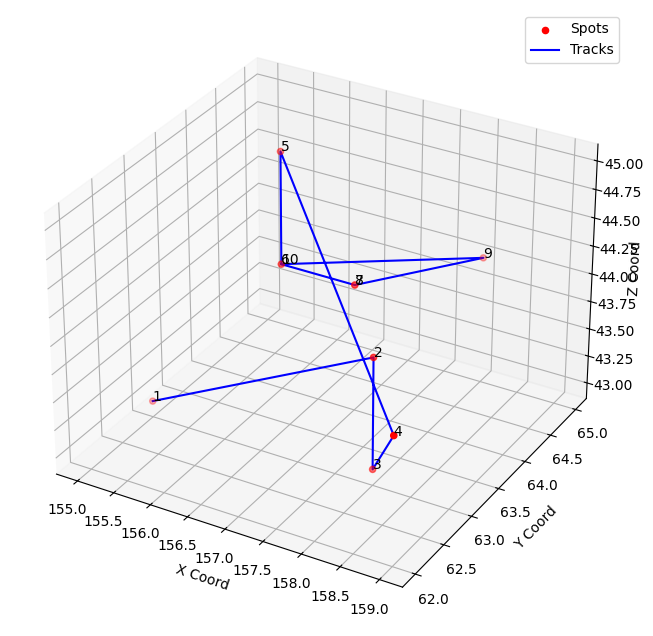

In [31]:
# Create a 3-D figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(temp['mu_x'], temp['mu_y'], temp['mu_z'], c='r', marker='o', label='Spots')

# Connect the points with lines
ax.plot(temp['mu_x'], temp['mu_y'], temp['mu_z'], c='b', linestyle='-', label='Tracks')

# Set labels for the axes
ax.set_xlabel('X Coord')
ax.set_ylabel('Y Coord')
ax.set_zlabel('Z Coord', labelpad=-2, rotation=100)


# Add a legend
ax.legend()

# Label the points in the order they were plotted
for i, (xi, yi, zi) in enumerate(zip(temp['mu_x'], temp['mu_y'], temp['mu_z'])):
    label = f'{i + 1}'
    ax.text(xi, yi, zi, label, fontsize=10)
    
# Show the plot
plt.show()

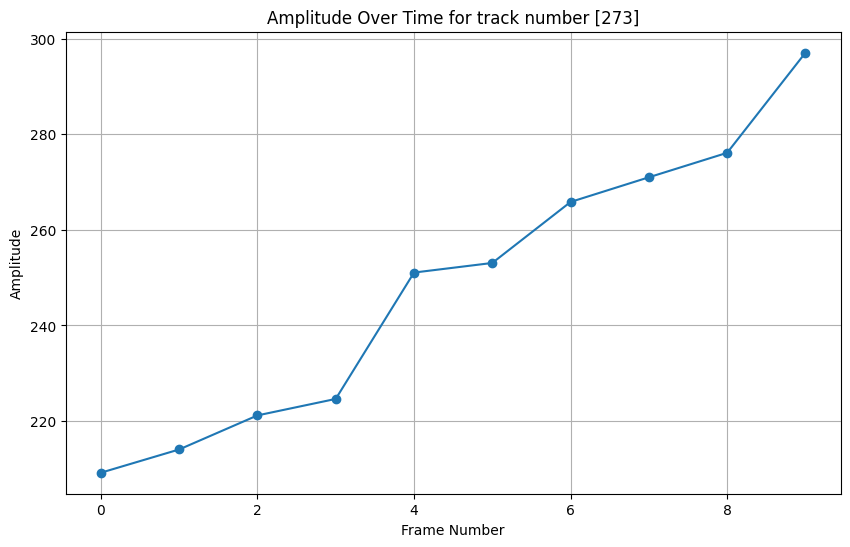

In [32]:
# Create a time series plot
track_id = temp['track_id'].unique()
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.plot(temp['frame'], temp['amplitude'], marker='o', linestyle='-')
plt.xlabel('Frame Number')
plt.ylabel('Amplitude')
plt.title(f'Amplitude Over Time for track number {track_id}')
plt.grid(True)

plt.show()